In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import TimeDistributed
sc = MinMaxScaler(feature_range = (0,1))
df2 = []
import pandas as pd

In [2]:
df = pd.read_csv('AIerror_ONU16_15S_CycleAi.csv', usecols=[1], engine='python')
print(df.head())
df = df.values
df = df.astype('float32')


    Ai
0  906
1  472
2  906
3  472
4  906


In [3]:
for i in range(len(df)):
    if(df[i] > 195000.0):
        df[i] = 195000.0
    df2.append(df[i])


In [4]:
print(df2)

[array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([13296.], dtype=float32), array([12431.], dtype=float32), array([8177.], dtype=float32), arra

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df2)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

30865 15203


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 50
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)

(30815, 50)
(30815,)
(15153, 50)


In [9]:
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [10]:
# create and fit the LSTM network

#model.add(LSTM(40, input_shape=(1, look_back)))
batch_size = 32
#batch_size = int(len(dataset)/90)

#trainX = tf.data.Dataset.from_tensor_slices((trainX, train_label))
#trainX = trainX.repeat().batch(batch_size, drop_remainder=True)
model = Sequential()

model.add(LSTM(40, input_shape=(look_back, 1), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(40, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(40, return_sequences=True))
model.add(Dropout(0.2))

#model.add(LSTM(40, stateful=True, return_sequences=True))

# model.add(LSTM(40, stateful=True, return_sequences=True))

# model.add(LSTM(40, stateful=True, return_sequences=True))

# model.add(LSTM(40, stateful=True, return_sequences=True))

model.add(LSTM(40, return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

#for i in range(10):
model.fit(trainX, trainY,batch_size=batch_size, epochs=100, shuffle=False)
#    model.reset_states()
    
#模型評估
trainPredict = model.predict(trainX, batch_size=batch_size)
#reset model
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
#model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(trainX, trainY, epochs=20, batch_size=32, verbose=1)

Epoch 1/100
963/963 [==============================] - 51s 48ms/step - loss: 0.0087 - accuracy: 0.0603
Epoch 2/100
963/963 [==============================] - 44s 46ms/step - loss: 0.0081 - accuracy: 0.0603
Epoch 3/100
963/963 [==============================] - 41s 43ms/step - loss: 0.0078 - accuracy: 0.0604
Epoch 4/100
963/963 [==============================] - 42s 43ms/step - loss: 0.0077 - accuracy: 0.0607
Epoch 5/100
963/963 [==============================] - 42s 44ms/step - loss: 0.0076 - accuracy: 0.0607
Epoch 6/100
963/963 [==============================] - 43s 44ms/step - loss: 0.0076 - accuracy: 0.0608
Epoch 7/100
963/963 [==============================] - 43s 45ms/step - loss: 0.0077 - accuracy: 0.0608
Epoch 8/100
963/963 [==============================] - 43s 45ms/step - loss: 0.0076 - accuracy: 0.0608
Epoch 9/100
963/963 [==============================] - 42s 44ms/step - loss: 0.0076 - accuracy: 0.0609
Epoch 10/100
963/963 [==============================] - 43s 44ms/step - l

In [11]:
from sklearn.metrics import mean_squared_error as mse
# make predictions
#trainPredict = model.predict(trainX)
#testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 15870.22 RMSE
Test Score: 15725.28 RMSE
Train Score: 93.42 RMAE
Test Score: 93.77 RMAE


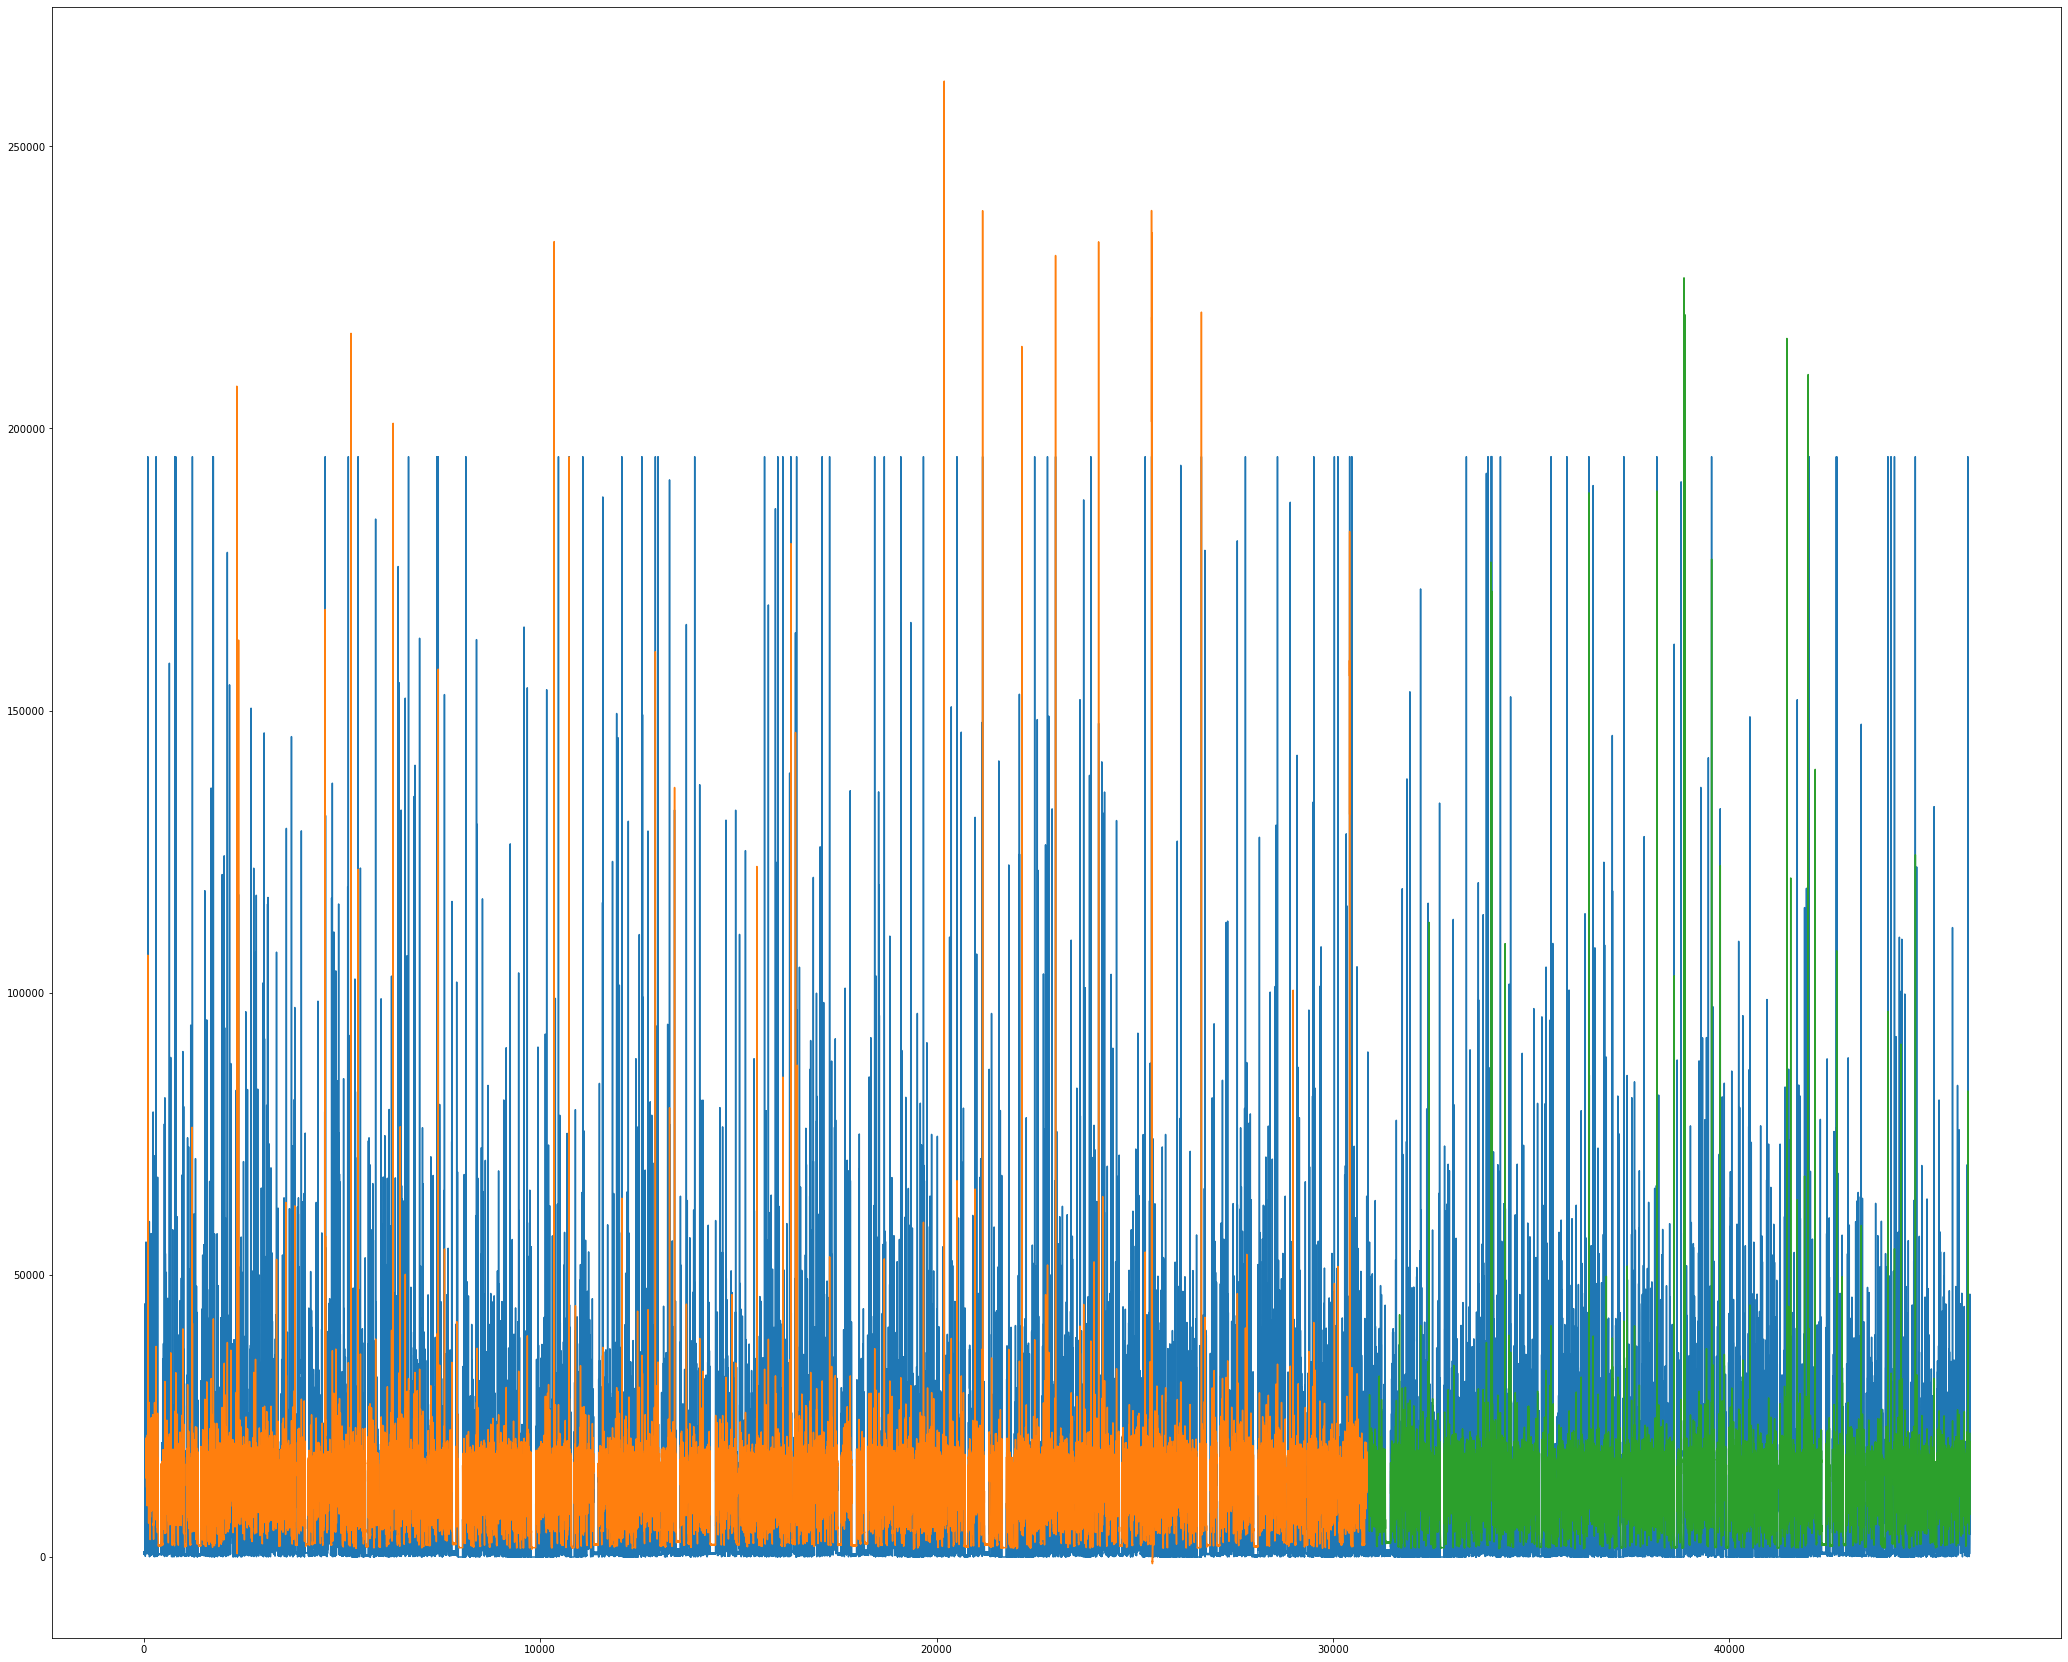

In [19]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(36, 30))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 40)            6720      
_________________________________________________________________
dropout (Dropout)            (None, 50, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 40)            12960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 40)            12960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)                1

In [15]:
from sklearn.metrics import r2_score
train_Y = trainY.T
test_Y = testY.T
print(r2_score(train_Y, trainPredict))
print(r2_score(test_Y, testPredict))

0.24844384363409422
0.27178001161090537


In [16]:
print(testPredict[0:100])

[[18936.178 ]
 [12005.285 ]
 [ 9006.35  ]
 [ 4562.8823]
 [15751.929 ]
 [18643.69  ]
 [17960.826 ]
 [28763.164 ]
 [16501.318 ]
 [14500.409 ]
 [ 7683.652 ]
 [16401.203 ]
 [17662.098 ]
 [12322.988 ]
 [21861.05  ]
 [19601.92  ]
 [17302.096 ]
 [18943.734 ]
 [14334.889 ]
 [16173.134 ]
 [16922.182 ]
 [18663.492 ]
 [11508.158 ]
 [16902.295 ]
 [15779.403 ]
 [12743.62  ]
 [16456.686 ]
 [16222.526 ]
 [14892.633 ]
 [15860.858 ]
 [16778.9   ]
 [ 8950.275 ]
 [17375.303 ]
 [14610.364 ]
 [16058.002 ]
 [15938.093 ]
 [16063.239 ]
 [15748.1045]
 [18586.293 ]
 [16806.094 ]
 [ 9340.572 ]
 [15684.182 ]
 [17101.727 ]
 [14909.615 ]
 [16606.994 ]
 [16304.868 ]
 [15511.136 ]
 [ 8093.837 ]
 [ 7168.5537]
 [18004.82  ]
 [18511.346 ]
 [17113.27  ]
 [12832.766 ]
 [16097.314 ]
 [22849.207 ]
 [13916.295 ]
 [18273.533 ]
 [14318.381 ]
 [10199.469 ]
 [11305.166 ]
 [15750.285 ]
 [ 7771.145 ]
 [ 6003.1855]
 [ 5040.045 ]
 [ 4508.226 ]
 [22090.629 ]
 [18662.842 ]
 [18201.773 ]
 [16254.536 ]
 [16671.66  ]
 [16346.144 ]
 [1639

In [17]:
print(test_Y[0:100])

[[4.0400e+02]
 [4.2900e+02]
 [4.0400e+02]
 [8.8450e+03]
 [2.2040e+04]
 [2.0002e+04]
 [5.5804e+04]
 [1.0330e+04]
 [8.3700e+03]
 [9.5000e+02]
 [8.3860e+03]
 [2.2005e+04]
 [5.8240e+03]
 [4.6811e+04]
 [2.2008e+04]
 [2.7520e+04]
 [3.3167e+04]
 [6.1600e+03]
 [1.5599e+04]
 [1.8898e+04]
 [2.9977e+04]
 [4.3200e+03]
 [2.8673e+04]
 [1.1559e+04]
 [3.8250e+03]
 [3.3481e+04]
 [1.1962e+04]
 [6.0870e+03]
 [1.3742e+04]
 [2.3268e+04]
 [6.8400e+02]
 [2.1036e+04]
 [9.7780e+03]
 [1.6594e+04]
 [1.7554e+04]
 [1.2558e+04]
 [9.2820e+03]
 [2.4380e+04]
 [1.5585e+04]
 [4.7300e+02]
 [4.9260e+03]
 [2.1374e+04]
 [1.0558e+04]
 [1.5038e+04]
 [1.3822e+04]
 [8.0860e+03]
 [1.6700e+02]
 [1.1770e+03]
 [1.6418e+04]
 [2.4912e+04]
 [1.6075e+04]
 [3.9150e+03]
 [1.1509e+04]
 [4.9799e+04]
 [9.7670e+03]
 [3.4498e+04]
 [3.0760e+03]
 [6.1500e+02]
 [2.6620e+03]
 [8.9810e+03]
 [2.8000e+01]
 [4.6000e+01]
 [2.8000e+01]
 [4.6000e+01]
 [6.8640e+03]
 [1.0407e+04]
 [1.1878e+04]
 [9.8420e+03]
 [1.3049e+04]
 [1.0553e+04]
 [8.0060e+03]
 [3.32

In [15]:
print(trainPredict.shape)

(30854, 1)


In [16]:
print(trainPredict[0])

[201.4337]


In [17]:
print(min(testPredict))

[-1857.8378]


In [18]:
model.save('U08D02_AIerror_ONU16_test0124_4layer.h5', include_optimizer=False)